In [11]:
import pandas as pd
import numpy as np
fracs = 100*np.array([0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
og_fracs = fracs.copy()
total_hours = (16665*3.5)/(60.*60.)

d_hours = {'hours_eng_pretrain': 4.3341666666666665,
 'hours_spa_test': 3.94625,
 'hours_eng_test': 3.8529166666666668,
 'hours_artic_test': 1.5720833333333333}
frac_hrs_pretrain = fracs.copy()*d_hours['hours_eng_pretrain']/100
frac_hrs_test = fracs.copy()*d_hours['hours_spa_test']/100

frac_lcs = []
for i,f in enumerate(fracs):
    frac_lcs.append(pd.read_excel('./figure_S1_sourcedata.xlsx',engine='openpyxl',sheet_name=f'Panel_{i}',index_col=0).values)

    
def getci(arr):
    y_up = []
    y_down = []
    for ar in arr.T:
        straps = bootstrap(ar)
        y_up.append(np.percentile(straps,99.5))
        y_down.append(np.percentile(straps,0.5))
        
        
    return(y_up,y_down)
        
def bootstrap(arr,itr=2000):
    boots = []
    for i in range(itr):
        boots.append(np.median(np.random.choice(arr,arr.shape,replace=True)))
        
    return(boots)

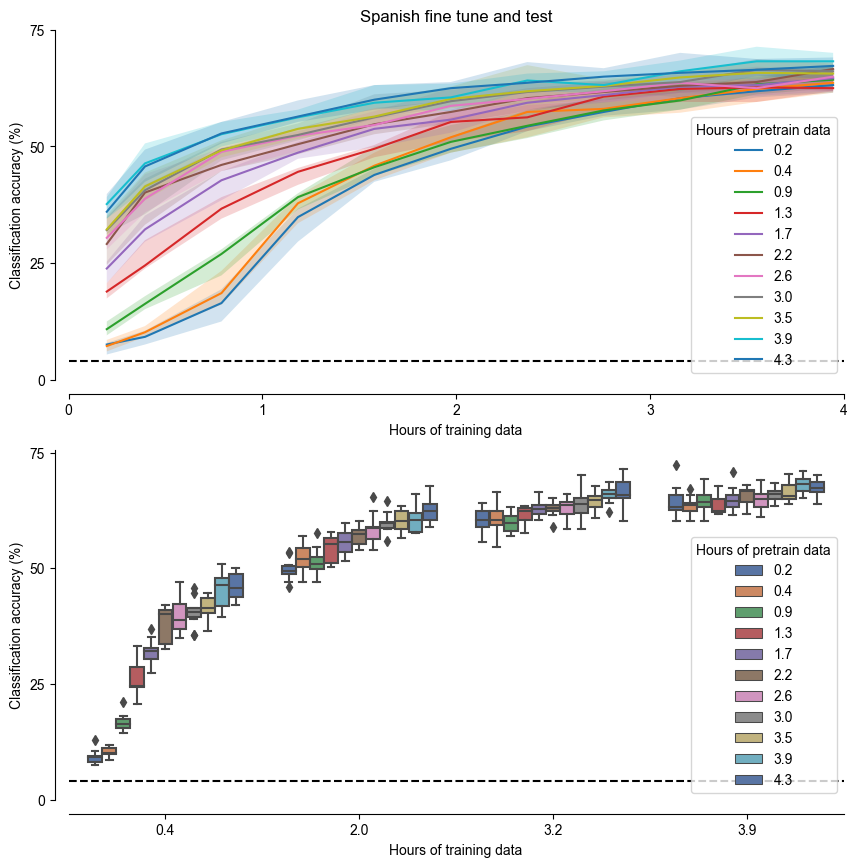

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams.update({'font.size': 10})#, 'font.sans-serif': 'Arial'})
fig,axs = plt.subplots(2,1,figsize = (10,10))
ax = axs[0]
plt_df = {'hours':[],'pretrain_hours':[],'acc':[]}
for i,f in enumerate(frac_lcs):
    y_up,y_down = getci(f)
    ax.plot(frac_hrs_test,np.median(f,axis=0))
    for hour,acc in zip(frac_hrs_test,f.T):
        for a in acc:
            plt_df['hours'].append(np.round(hour,1))
            plt_df['acc'].append(a)
            plt_df['pretrain_hours'].append(np.round(frac_hrs_pretrain[i],1))
for f in frac_lcs: 
    y_up,y_down = getci(f)
    ax.fill_between(frac_hrs_test, y_up, y_down,alpha=0.2)    
ax.legend(np.round(frac_hrs_pretrain,1),title='Hours of pretrain data')   
ax.set_xlabel('Hours of training data')
ax.set_title('Spanish fine tune and test')
ax.set_ylabel('Classification accuracy (%)')
ax.set_yticks([0,0.25,0.5,0.75])
ax.set_yticklabels([0,25,50,75])
ax.set_ylim([0,0.75])
ax.set_xticks([0,1,2,3,4])
ax.set_xlim([0,4])
sns.despine(ax=ax, offset=dict(left=10, bottom=10))
ax.axhline(1/25.,linestyle='--',color='k')

ax = axs[1]
sns.boxplot(data=plt_df,y='acc',x='hours',hue='pretrain_hours',order=np.round(frac_hrs_test,1)[[1,5,-3,-1]],palette='deep',ax=ax)
ax.set_xlabel('Hours of training data')
#ax.set_title('Spanish fine tune and test')
ax.set_ylabel('Classification accuracy (%)')
ax.set_yticks([0,0.25,0.5,0.75])
ax.set_yticklabels([0,25,50,75])
sns.despine(ax=ax, offset=dict(left=10, bottom=10))
ax.axhline(1/25.,linestyle='--',color='k')
ax.get_legend().set_title('Hours of pretrain data')
plt.savefig('./figure_S1.jpg',dpi=300)

#ax.legend.set_title('Hours of pretrain data')